## Title: Predicting January Average High Temperatures in New York City
## Author: Ryan Krabbe  
## Github: https://github.com/ryankrabbe/datafun-07-ml

In [ ]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pyarrow as pa

## Part 1 - Chart a Straight Line

In [1]:
c = lambda f: 5/ 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

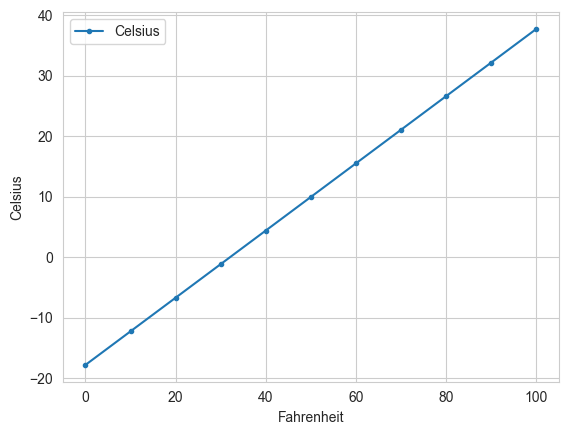

In [213]:
import pandas as pd
temps_nyc = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_nyc.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Predict Avg High Temp in NYC in January

### Section 1 - Data Acquisition

In [214]:
#Load Data
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [215]:
# Analyse Data
nyc.head()

,Date,Value,Anomaly
0,189501,29.6,-1.9
1,189601,28.3,-3.2
2,189701,29.2,-2.3
3,189801,33.7,2.2
4,189901,29.7,-1.8


In [216]:
# Analyse Data
nyc.tail()

,Date,Value,Anomaly
119,201401,28.7,-2.8
120,201501,30.0,-1.5
121,201601,34.5,3.0
122,201701,38.1,6.6
123,201801,31.8,0.3


### Section 3 - Data Cleaning

In [217]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [218]:
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,29.6,-1.9
1,189601,28.3,-3.2
2,189701,29.2,-2.3


In [219]:
nyc.Date.dtype

dtype('int64')

In [220]:
nyc.Date = nyc.Date.floordiv(100)

In [221]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,29.6,-1.9
1,1896,28.3,-3.2
2,1897,29.2,-2.3


### Section 4 - Descriptive Statistics

In [222]:
pd.set_option('display.precision', 2)

In [223]:
nyc.Temperature.describe()

count    124.00
mean      31.70
std        4.49
min       20.80
25%       28.88
50%       31.40
75%       34.60
max       42.40
Name: Temperature, dtype: float64

### Section 5 - Build The Model


In [224]:
from scipy import stats
liner_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [225]:
liner_regression.slope

0.024819826907946492

In [226]:
liner_regression.intercept

-16.862410700236026

In [227]:
liner_regression.slope * 2019 + liner_regression.intercept

33.24881982690794

In [228]:
liner_regression.slope * 1890 + liner_regression.intercept

30.047062155782847

### Section 6 - Predict

In [229]:
liner_regression.slope * 2024 + liner_regression.intercept

33.372918961447674

### Section 7 - Visualizations

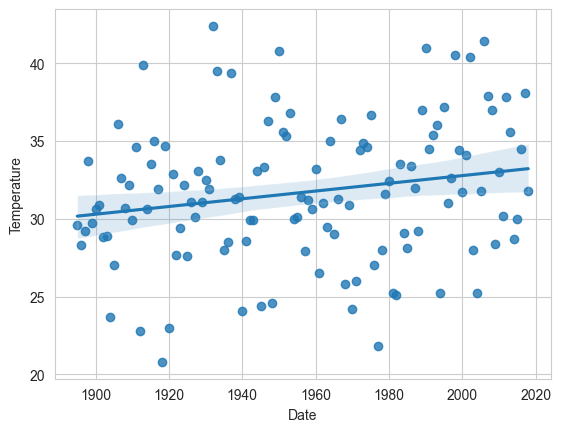

In [230]:
import seaborn as sns
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

In [231]:
axes.set_ylim(10,70)

(10.0, 70.0)

## Part 3 - Prediction

### Section 1 - Build The Model

In [232]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, random_state=3)

In [233]:
X_train.shape

(93, 1)

In [234]:
X_test.shape

(31, 1)

In [235]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [236]:
m = linear_regression.coef_

In [237]:
b = linear_regression.intercept_

In [249]:
print(f'The linear regression equation is y = {m}x + {b}.')

The linear regression equation is y = [0.02041629]x + -7.792688109263608.


### Section 2 - Test the Model

In [250]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 31.75, expected: 39.40
predicted: 31.41, expected: 23.00
predicted: 31.37, expected: 20.80
predicted: 32.92, expected: 25.20
predicted: 32.08, expected: 36.80
predicted: 31.81, expected: 24.10
predicted: 32.84, expected: 41.00


### Section 3 - Predict

In [257]:
predict = (lambda x: m * x + b)
predict(2024)

array([33.52988075])

### Section 4 - Visualizations

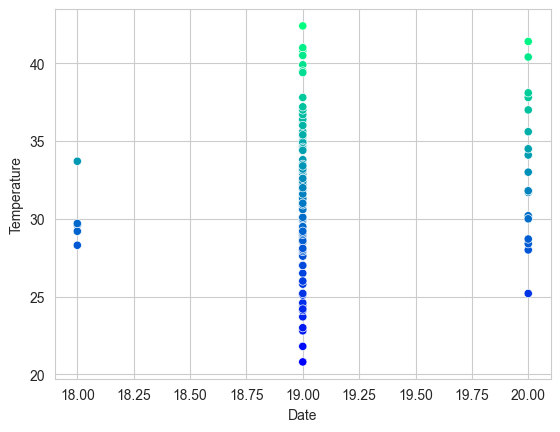

In [263]:
import seaborn as sns
axes = sns.scatterplot(data=df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)

In [264]:
axes.set_ylim(10,70)

(10.0, 70.0)

In [265]:
import numpy as np
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

In [266]:
y = predict(x)

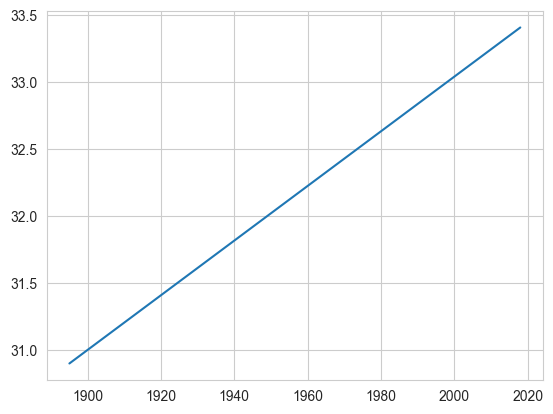

In [268]:
import matplotlib.pyplot as plt
line = plt.plot(x, y)

## Part 4 - Comparing the Two Methods and Final Thoughts

The first method was much more accurate and easier to implement for me. The second method produced some strange results and charts, which I am still not sure why after troubleshooting and looking into it. Overall, I much preferred the first method.
I've learned so much throughout this course and I'm eager to see where the rest of the program takes me. I know this is only the beginning of my Data Analytics journey, but this course has laid the foundation for many of the skills that will be applied in future classes. I can't wait to see what the rest of the program has to offer! 